# Practical Neural Network Implementation Assignment

In this assignment, you will implement a neural network from scratch using Python and NumPy. Your implementation should include all the necessary components for training on a sample dataset.

## Task 1: Basic Structure

1. Implement a `Neuron` class that represents a single neuron with weights, bias, and an activation function.
2. Create a `Layer` class that can hold multiple neurons.
3. Implement a `NeuralNetwork` class that can contain multiple layers.

## Task 2: Forward Propagation

4. Implement forward propagation for the `Neuron`, `Layer`, and `NeuralNetwork` classes.
5. Add support for different activation functions (at least ReLU and Sigmoid).

## Task 3: Loss Function

6. Implement a `LossFunction` class with loss functions:
   - Mean Squared Error (MSE)
  

## Task 4: Backpropagation

7. Implement the backpropagation algorithm for your neural network.
8. Ensure that gradients are correctly calculated and propagated through the network.

## Task 5: Optimization

9. Implement a simple optimizer (e.g., Stochastic Gradient Descent) to update weights and biases.
10. Add support for different learning rates.

## Task 6: Training Loop

11. Create a training loop that can:
    - Perform forward propagation
    - Calculate loss
    - Perform backpropagation
    - Update weights and biases
12. Implement a method to track and display training progress (e.g., loss over epochs).

## Task 7: Evaluation

13. Implement methods to evaluate the model's performance on a test set.
14. Add support for different evaluation metrics (e.g., accuracy for classification tasks).

## Task 8: Sample Dataset

15. Generate or load a simple dataset Spiral dataset
16. Split the dataset into training and testing sets.

## Task 9: Training and Testing

17. Train your neural network on the training set.



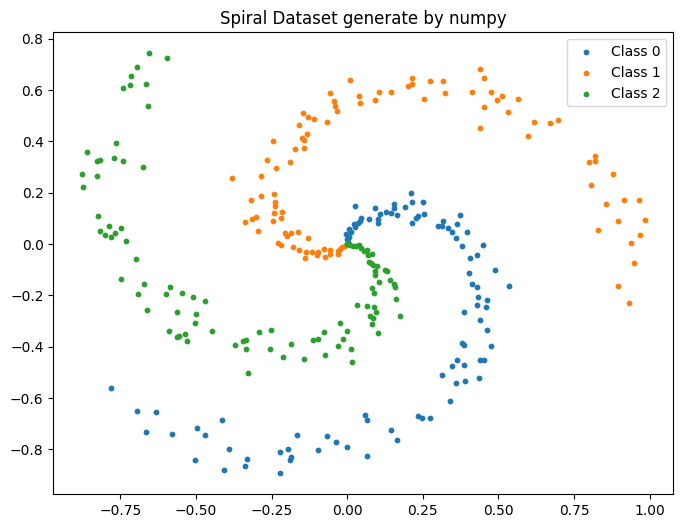

Output: [0.5 0.5 0.5]


In [7]:
import numpy as np
import matplotlib.pyplot as plt  

class Neuron:
    def __init__(self, n_inputs, activation='relu'):
        self.weights = np.random.randn(n_inputs) * 0.01
        self.bias = 0
        self.activation = activation

    def activate(self, z):
        if self.activation == 'relu':
            return np.maximum(0, z)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        else:
            raise ValueError(f"Unknown activation function: {self.activation}")

    def forward(self, inputs):
        self.inputs = inputs
        self.z = np.dot(self.weights, inputs) + self.bias
        self.output = self.activate(self.z)
        return self.output


class Layer:
    def __init__(self, n_neurons, n_inputs_per_neuron, activation='relu'):
        self.neurons = [Neuron(n_inputs_per_neuron, activation) for _ in range(n_neurons)]

    def forward(self, inputs):
        self.outputs = np.array([neuron.forward(inputs) for neuron in self.neurons])
        return self.outputs


class NeuralNetwork:
    def __init__(self):
        self.layers = []

    def add_layer(self, n_neurons, n_inputs_per_neuron, activation='relu'):
        self.layers.append(Layer(n_neurons, n_inputs_per_neuron, activation))

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs


class LossFunction:
    @staticmethod
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -2 * (y_true - y_pred) / len(y_true)


def generate_spiral_dataset(n_points, n_classes):
    X = []
    y = []
    for class_number in range(n_classes):
        for i in range(n_points):
            r = i / n_points
            theta = class_number * 4 + r * 4 + np.random.randn() * 0.2
            X.append([r * np.sin(theta), r * np.cos(theta)])
            y.append(class_number)
    return np.array(X), np.array(y)


if __name__ == "__main__": 
    X, y = generate_spiral_dataset(100, 3)

    # Visualize  
    plt.figure(figsize=(8, 6))
    for class_number in np.unique(y):
        plt.scatter(X[y == class_number, 0], X[y == class_number, 1], label=f"Class {class_number}", s=10)
    plt.title("Spiral Dataset generate by numpy") 
    plt.legend()
    plt.show()
 
    nn = NeuralNetwork()
    nn.add_layer(10, 2, activation='relu')
    nn.add_layer(3, 10, activation='sigmoid')
 
    outputs = nn.forward(X[0])
    print("Output:", outputs)
